In [30]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats

# Loading in data

In [31]:
dataPath = 'Data/2016-2019 (O3 Only)'
listOfDataFrames=[]
stations=os.listdir(dataPath)
for station in stations:
    print("Processing year: "+ dataPath +" station: "+station)
    airQualityData=pd.read_csv(dataPath+'\\'+station, header=10,sep=';').rename(columns={'Start':'Start','Slut':'Stop'})
    airQualityData.rename(columns = lambda x: re.sub('O3.*','O3',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('PM10.*','PM10',x), inplace = True)
    listOfDataFrames.append(airQualityData)
airQualityData= pd.DataFrame(columns= [])
for airData in listOfDataFrames:
    airQualityData=airQualityData.append(airData)
    
airQualityData['Start'] = pd.to_datetime(airQualityData['Start'])
print(airQualityData.head(5))
print(airQualityData.shape)

Processing year: Data/2016-2019 (O3 Only) station: shair-8780-1-6-3 (1).csv
Processing year: Data/2016-2019 (O3 Only) station: shair-8781-1-6-1 (1).csv
                Start              Stop    O3  PM10
0 2016-01-01 00:00:00  2016-01-01 01:00  56.0  35.5
1 2016-01-01 01:00:00  2016-01-01 02:00  54.5  14.2
2 2016-01-01 02:00:00  2016-01-01 03:00  59.3  12.3
3 2016-01-01 03:00:00  2016-01-01 04:00  57.2  12.5
4 2016-01-01 04:00:00  2016-01-01 05:00  56.0  12.2
(70128, 4)


#### View percentage of available data

<AxesSubplot:>

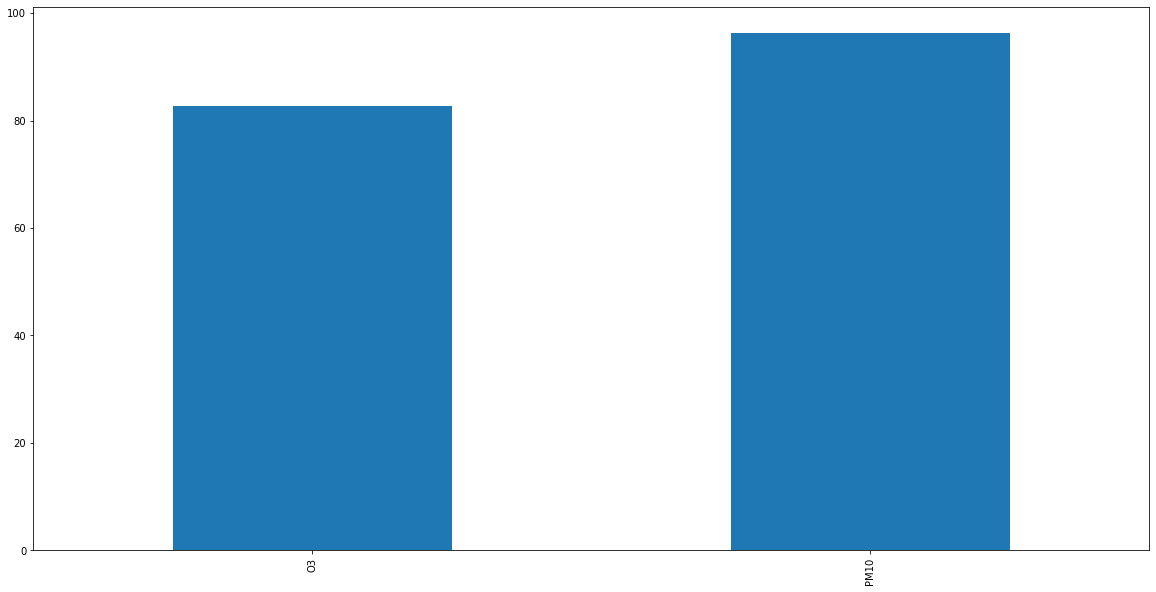

In [32]:
total = airQualityData.isnull().sum().sort_values(ascending = False)
total = total[airQualityData.isnull().sum().sort_values(ascending = False) != 0]
percent =  100 - total / len(airQualityData) * 100
percent[airQualityData.isnull().sum().sort_values(ascending = False) != 0].plot.bar(figsize = (20,10))

#### Correlation with outliers and missing data (O3)

<AxesSubplot:>

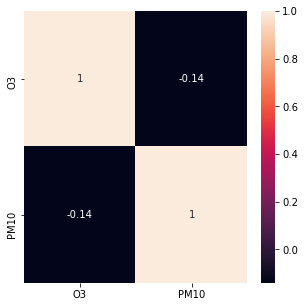

In [4]:
processed_df=airQualityData.drop(columns=['Start','Stop'])
fig , ax =plt.subplots(figsize=(5,5))
sns.heatmap(processed_df.corr(), annot=True)

#### Correlation with outliers and imputed data (O3)

In [184]:
#-------PERFORMING IMPUTATION---------------#
impute=airQualityData.drop(columns=['Stop'])
impute=impute.set_index('Start')
impute = impute.assign(PM10=impute['PM10'].interpolate(method='time'))
impute = impute.assign(O3=impute['O3'].interpolate(method='time'))

<AxesSubplot:>

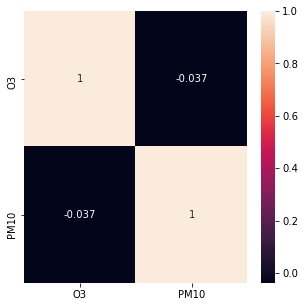

In [185]:
fig , ax =plt.subplots(figsize=(5,5))
sns.heatmap(impute.corr(), annot=True)

#### Viewing time series

<AxesSubplot:xlabel='Start', ylabel='PM10'>

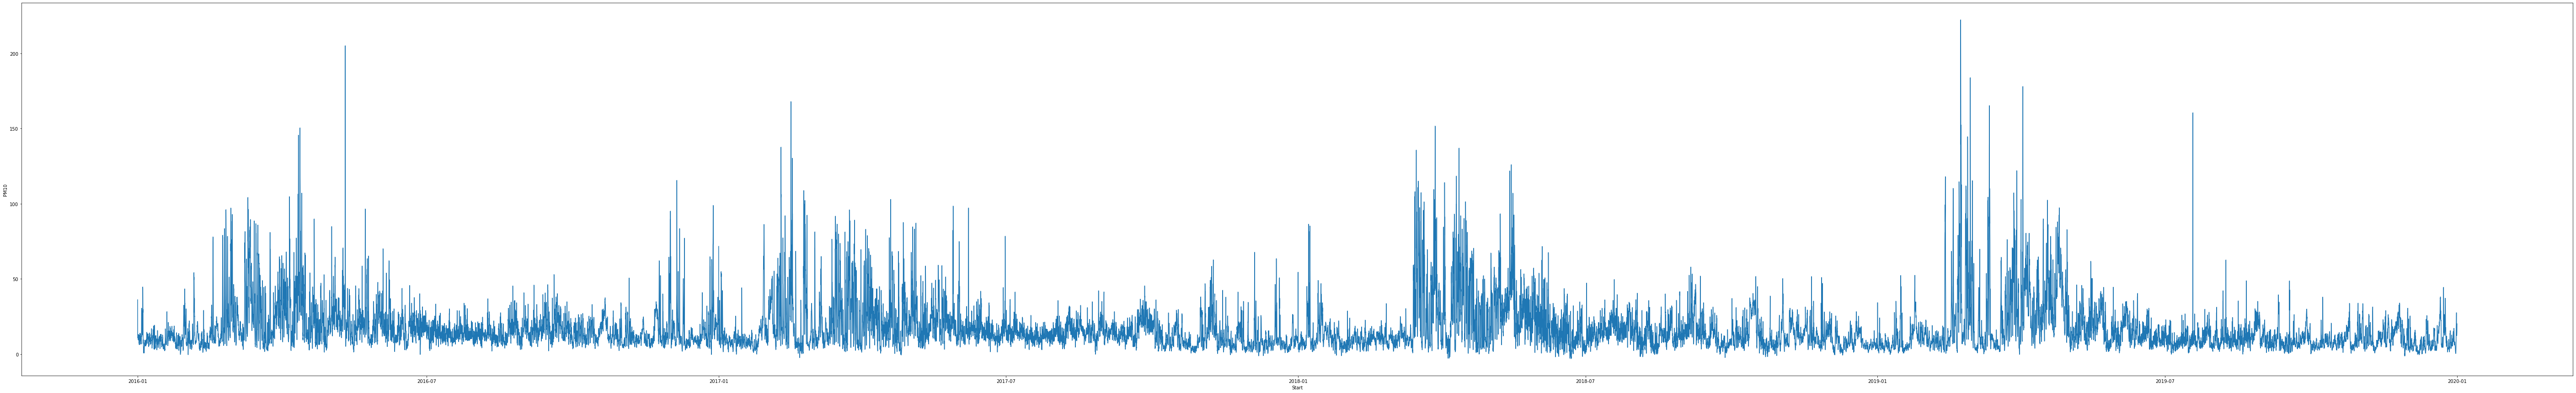

In [72]:
resampled=airQualityData.groupby(['Start']).mean().resample('1h').mean()#resampling into 4 hours with mean taken of the 4 hours values
fig , ax =  plt.subplots(figsize=(100,15))
sns.lineplot(data=resampled['PM10'],ax=ax)

c:\users\jad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[1.]


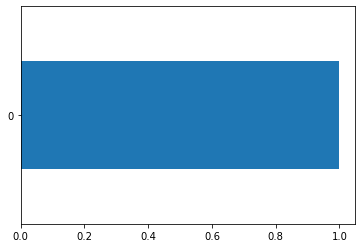

In [199]:
X=impute.iloc[:,0].values.reshape(-1, 1).astype('int')
y=impute.iloc[:,1].values.reshape(-1, 1).astype('int')
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [152]:
np.isnan(np.sum())

True

In [153]:
np.count_nonzero(np.isnan(X))

2567